In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Upload data

In [2]:
xl_file = pd.ExcelFile("data/inflammatory_bowel_disease.xlsx")

In [3]:
data = xl_file.parse('Sheet1')

In [4]:
data.head(3)

,Group,Age,Ethnicity,Sex,200006_at,200091_s_at,200660_at,200704_at,200706_s_at,200779_at,...,221085_at,221092_at,221111_at,221165_s_at,221331_x_at,221371_at,221690_s_at,222292_at,35150_at,40273_at
0,Ulcerative Colitis,25,caucasian,female,1066.743652,3438.648926,197.507767,1836.721680,955.033936,2947.250244,...,6.984630,2.943779,0.394986,49.597721,37.127441,25.306889,64.756462,19.020729,141.292740,6.059303
1,Crohn's Disease,46,caucasian,female,691.848511,1754.629028,511.375732,1921.327637,883.717041,2900.088379,...,16.313744,27.600016,1.423127,83.653114,25.552881,55.010540,98.586563,31.993961,203.378326,30.333281
2,Ulcerative Colitis,45,caucasian,male,1013.811218,2837.300293,398.175842,1363.131348,715.677734,1841.662231,...,21.288982,16.433182,1.492513,35.662075,51.398350,40.420418,33.374344,20.363697,297.299896,7.745946


In [5]:
data.shape

(126, 313)

### Check for missing values

In [6]:
# data.info(null_counts = True)
data.columns[data.isnull().any()]

Index([], dtype='object')

In [7]:
data.describe()

,Age,200006_at,200091_s_at,200660_at,200704_at,200706_s_at,200779_at,200887_s_at,200930_s_at,200931_s_at,...,221085_at,221092_at,221111_at,221165_s_at,221331_x_at,221371_at,221690_s_at,222292_at,35150_at,40273_at
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,...,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,43.349206,1215.801751,2745.052740,516.310863,1749.067034,767.372498,2219.352499,343.995431,12.342073,1264.644157,...,9.447770,13.732901,1.510830,35.238830,35.437796,28.240388,28.911873,24.122545,187.727344,12.405966
std,11.867480,254.809757,529.395962,406.843221,547.203739,226.676809,484.185046,167.163730,9.508315,544.953499,...,4.699025,6.851094,1.637212,13.537013,13.129093,10.523375,17.698536,7.937837,44.367665,9.094164
min,20.000000,690.489563,1457.362671,98.147346,760.198120,285.731995,1321.986572,134.746964,1.851470,439.081696,...,0.848673,2.054569,0.146600,9.248687,2.612904,7.441447,2.366859,3.948824,112.036255,3.060528
25%,33.000000,1044.238404,2400.353638,220.896386,1302.133819,628.939362,1927.020294,234.164978,3.916158,851.149353,...,5.693006,8.187149,0.555453,25.359546,28.122322,21.767292,14.451027,18.589443,156.227955,7.058083
50%,44.000000,1180.693298,2716.941650,397.264038,1648.126160,743.295319,2166.063843,300.076157,9.645253,1213.802063,...,9.381419,13.800381,0.909731,33.918798,33.862603,27.991096,29.344338,23.907126,180.671555,9.227654
75%,52.750000,1332.719116,3029.496643,652.917862,2149.108398,907.380081,2415.435730,403.114700,18.767180,1549.647308,...,12.835523,18.410686,1.579755,42.343691,42.372014,34.369474,40.517549,29.057170,206.271896,13.175500
max,73.000000,2042.485352,4619.833496,2179.448975,3413.215820,1471.550293,4676.083496,1212.880737,40.837177,3346.568115,...,21.569151,27.727972,7.835695,85.354797,81.683067,57.610249,98.586563,48.069141,388.248810,50.327541


In [8]:
data['Ethnicity'].value_counts()

caucasian    111
black         10
hispanic       2
indian         1
cacuasian      1
asian          1
Name: Ethnicity, dtype: int64

In [9]:
# Replace the misspelled word with the correct word
data[data['Ethnicity'] == 'cacuasian'] = 'caucasian'

In [10]:
data['Ethnicity'].value_counts()

caucasian    112
black         10
hispanic       2
indian         1
asian          1
Name: Ethnicity, dtype: int64

In [11]:
data['Sex'].value_counts()

female       73
male         52
caucasian     1
Name: Sex, dtype: int64

In [12]:
data[data['Sex'] == 'caucasian'] = 'female'

In [13]:
data['Sex'].value_counts()

female    74
male      52
Name: Sex, dtype: int64

In [14]:
data['Group'].value_counts()

Crohn's Disease       58
Normal                41
Ulcerative Colitis    25
Ulcerative             1
female                 1
Name: Group, dtype: int64

### Remove the row where group = 'female'

In [15]:
data = data[data.Group != 'female']

In [16]:
data.loc[data['Group'] == 'Ulcerative', 'Group'] = 'Ulcerative Colitis'

In [17]:
data['Group'].value_counts()

Crohn's Disease       58
Normal                41
Ulcerative Colitis    26
Name: Group, dtype: int64

### Number of people in each disease group

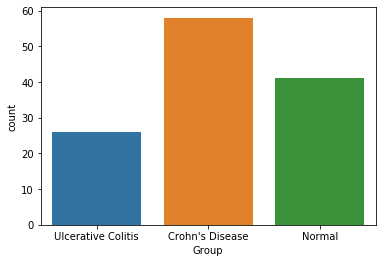

In [18]:
%matplotlib inline
sns.countplot(data['Group'], label = 'count')

### Group by age

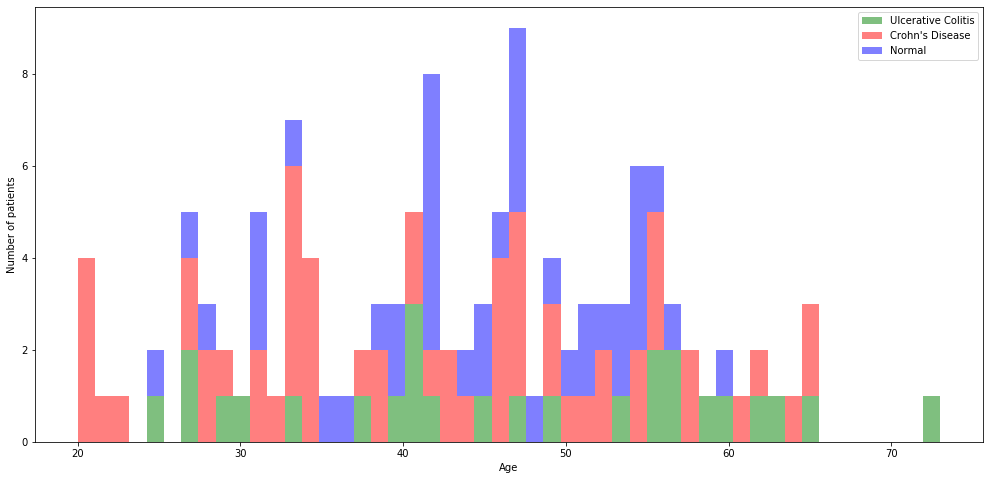

In [19]:
figure = plt.figure(figsize=(17,8))
plt.hist([data[data['Group']=='Ulcerative Colitis']['Age'], data[data['Group']== 'Crohn\'s Disease']['Age'], 
          data[data['Group']== 'Normal']['Age']],stacked=True, color = ['g','r','b'],bins = 50, alpha = 0.5,
         label = ['Ulcerative Colitis','Crohn\'s Disease', 'Normal'])
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.legend()

### Group by sex

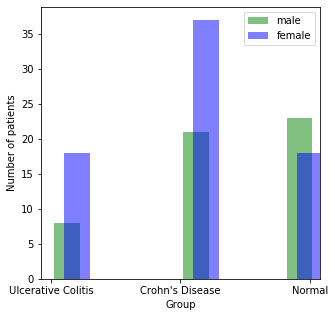

In [20]:
figure = plt.figure(figsize = (5,5))
plt.hist([data[data['Sex']=='male']['Group'], data[data['Sex']=='female']['Group']], color=['g','b'],width=0.2,
         alpha=0.5, label=['male','female'])
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()

In [21]:
# data types
data.dtypes

Group          object
Age            object
Ethnicity      object
Sex            object
200006_at      object
                ...  
221371_at      object
221690_s_at    object
222292_at      object
35150_at       object
40273_at       object
Length: 313, dtype: object

In [22]:

all_columns = list(data.iloc[:,4:313]) # Creates list of all column headers
data[all_columns] =data[all_columns].astype(float)


In [23]:

data['Age'] =data['Age'].astype(int)



In [24]:
data.dtypes

Group           object
Age              int32
Ethnicity       object
Sex             object
200006_at      float64
                ...   
221371_at      float64
221690_s_at    float64
222292_at      float64
35150_at       float64
40273_at       float64
Length: 313, dtype: object

In [25]:
# Encoding the target variable
from sklearn.preprocessing import LabelEncoder
labelEncoder_y = LabelEncoder()
data.iloc[:,0] = labelEncoder_y.fit_transform(data.iloc[:,0].values)

In [26]:
# Remove the Ethnicity column because there is no enough data to represent all the categories of the ethnicity group
data = data.drop(columns=['Ethnicity'])
data.head(3)

,Group,Age,Sex,200006_at,200091_s_at,200660_at,200704_at,200706_s_at,200779_at,200887_s_at,...,221085_at,221092_at,221111_at,221165_s_at,221331_x_at,221371_at,221690_s_at,222292_at,35150_at,40273_at
0,2,25,female,1066.743652,3438.648926,197.507767,1836.721680,955.033936,2947.250244,134.746964,...,6.984630,2.943779,0.394986,49.597721,37.127441,25.306889,64.756462,19.020729,141.292740,6.059303
1,0,46,female,691.848511,1754.629028,511.375732,1921.327637,883.717041,2900.088379,394.818756,...,16.313744,27.600016,1.423127,83.653114,25.552881,55.010540,98.586563,31.993961,203.378326,30.333281
2,2,45,male,1013.811218,2837.300293,398.175842,1363.131348,715.677734,1841.662231,198.922958,...,21.288982,16.433182,1.492513,35.662075,51.398350,40.420418,33.374344,20.363697,297.299896,7.745946


In [27]:
# Encoding the 'Sex' variable
data.iloc[:,2] = labelEncoder_y.fit_transform(data.iloc[:,2].values)

In [28]:
data.head(3)

,Group,Age,Sex,200006_at,200091_s_at,200660_at,200704_at,200706_s_at,200779_at,200887_s_at,...,221085_at,221092_at,221111_at,221165_s_at,221331_x_at,221371_at,221690_s_at,222292_at,35150_at,40273_at
0,2,25,0,1066.743652,3438.648926,197.507767,1836.721680,955.033936,2947.250244,134.746964,...,6.984630,2.943779,0.394986,49.597721,37.127441,25.306889,64.756462,19.020729,141.292740,6.059303
1,0,46,0,691.848511,1754.629028,511.375732,1921.327637,883.717041,2900.088379,394.818756,...,16.313744,27.600016,1.423127,83.653114,25.552881,55.010540,98.586563,31.993961,203.378326,30.333281
2,2,45,1,1013.811218,2837.300293,398.175842,1363.131348,715.677734,1841.662231,198.922958,...,21.288982,16.433182,1.492513,35.662075,51.398350,40.420418,33.374344,20.363697,297.299896,7.745946


In [29]:
# Encode Sex column using one-hot encoder
from sklearn.preprocessing import OneHotEncoder
sex_enc = OneHotEncoder(categories='auto')

X = sex_enc.fit_transform(data.Sex.values.reshape(-1,1)).toarray()

In [30]:
sex_onehot = pd.DataFrame(X, columns = ['male', 'female'])
# data = pd.concat([data, sex_onehot], axis=1)
data.insert(2,"Male", sex_onehot['male'].values)
data.insert(3,"Female", sex_onehot['female'].values)

In [31]:
data = data.drop(columns=['Sex'])
data.head(10)

,Group,Age,Male,Female,200006_at,200091_s_at,200660_at,200704_at,200706_s_at,200779_at,...,221085_at,221092_at,221111_at,221165_s_at,221331_x_at,221371_at,221690_s_at,222292_at,35150_at,40273_at
0,2,25,1.0,0.0,1066.743652,3438.648926,197.507767,1836.721680,955.033936,2947.250244,...,6.984630,2.943779,0.394986,49.597721,37.127441,25.306889,64.756462,19.020729,141.292740,6.059303
1,0,46,1.0,0.0,691.848511,1754.629028,511.375732,1921.327637,883.717041,2900.088379,...,16.313744,27.600016,1.423127,83.653114,25.552881,55.010540,98.586563,31.993961,203.378326,30.333281
2,2,45,0.0,1.0,1013.811218,2837.300293,398.175842,1363.131348,715.677734,1841.662231,...,21.288982,16.433182,1.492513,35.662075,51.398350,40.420418,33.374344,20.363697,297.299896,7.745946
3,0,46,1.0,0.0,1134.788818,2805.885254,321.680237,1202.753052,519.658508,2389.312988,...,7.967771,16.167805,1.271991,29.136316,56.511452,12.512635,42.196774,27.121355,173.880432,10.553603
4,0,38,0.0,1.0,1354.319214,1956.348877,981.175354,2276.090332,864.241882,1709.656616,...,11.763982,9.427041,1.018824,36.908871,18.627043,24.981642,4.816647,17.824654,160.783493,10.236055
5,0,34,1.0,0.0,946.365662,2464.079102,168.552780,1633.989990,496.589935,2787.682373,...,12.619734,12.429363,1.367956,44.958858,24.542097,28.526945,5.690206,39.164494,227.560944,6.777221
6,0,54,0.0,1.0,1879.218506,2206.677246,2138.484131,2761.670654,945.884094,2083.564453,...,3.193714,12.812471,7.075439,42.583820,20.788658,22.913269,16.484034,31.764591,199.174805,9.823449
7,0,47,1.0,0.0,1486.181885,1457.362671,1454.456177,1606.972656,892.147949,1938.003174,...,16.861446,2.901434,0.416798,29.472208,2.612904,9.942989,10.985009,21.765324,186.594742,33.370800
8,2,49,1.0,0.0,1335.065918,2544.056152,392.005432,1820.360596,938.168335,2359.022949,...,8.781388,11.381090,0.671571,22.110672,23.173855,28.049915,5.754722,18.082279,120.799202,6.688927
9,0,31,0.0,1.0,982.596313,2614.527588,260.511322,2358.931885,896.369446,2353.855469,...,12.960254,3.468214,0.894941,49.155254,56.424107,48.104645,8.303145,24.751717,203.478043,8.394868


In [32]:
data.iloc[:,0:4].corr()

,Group,Age,Male,Female
Group,1.000000,0.167219,-0.006503,0.006503
Age,0.167219,1.000000,-0.024890,0.024890
Male,-0.006503,-0.024890,1.000000,-1.000000
Female,0.006503,0.024890,-1.000000,1.000000


In [33]:
print(data['200006_at'].min())
print(data['200006_at'].max())

690.489563
2042.485352


### Check skewness of gene array data

In [34]:
data.iloc[:,10:23].skew(axis = 0) 

200887_s_at    2.020309
200930_s_at    0.938797
200931_s_at    1.054458
200982_s_at    1.594076
201041_s_at    0.096225
201044_x_at    3.277943
201095_at      1.066967
201459_at      1.033663
201460_at      0.644160
201461_s_at    0.510759
201642_at      2.956288
201783_s_at    0.514281
202018_s_at    3.308993
dtype: float64

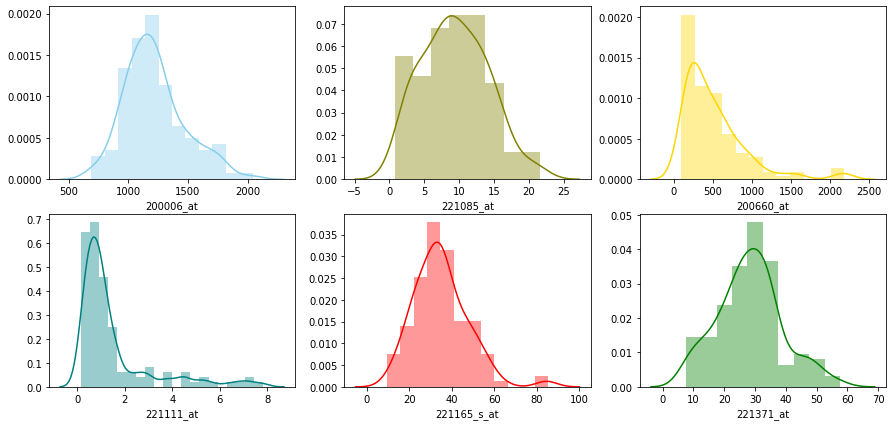

In [35]:
# data.iloc[:,10:23].hist(bins=50)
f, axes = plt.subplots(2, 3, figsize=(15, 7))
sns.distplot( data["200006_at"] , color="skyblue", ax=axes[0, 0])
sns.distplot( data["221085_at"] , color="olive", ax=axes[0, 1])
sns.distplot( data["200660_at"] , color="gold", ax=axes[0, 2])
sns.distplot( data["221111_at"] , color="teal", ax=axes[1, 0])
sns.distplot( data["221165_s_at"] , color="red", ax=axes[1, 1])
sns.distplot( data["221371_at"] , color="green", ax=axes[1, 2])

### Log transform data to get normal distributions

In [36]:
# Gene array data are skewed. Need to log transformation
data.iloc[:,4:313] = data.iloc[:,4:313].apply(np.log)

In [37]:
data.head(3)

,Group,Age,Male,Female,200006_at,200091_s_at,200660_at,200704_at,200706_s_at,200779_at,...,221085_at,221092_at,221111_at,221165_s_at,221331_x_at,221371_at,221690_s_at,222292_at,35150_at,40273_at
0,2,25,1.0,0.0,6.972366,8.142834,5.285778,7.515738,6.861747,7.988628,...,1.943712,1.079694,-0.928905,3.903945,3.614356,3.231077,4.170633,2.945529,4.950834,1.801595
1,0,46,1.0,0.0,6.539367,7.470013,6.237105,7.560772,6.784137,7.972496,...,2.792008,3.317816,0.352857,4.426679,3.240750,4.007525,4.590935,3.465547,5.315068,3.412245
2,2,45,0.0,1.0,6.921472,7.950608,5.986894,7.217540,6.573230,7.518424,...,3.058190,2.799303,0.400461,3.574088,3.939606,3.699335,3.507787,3.013754,5.694741,2.047170


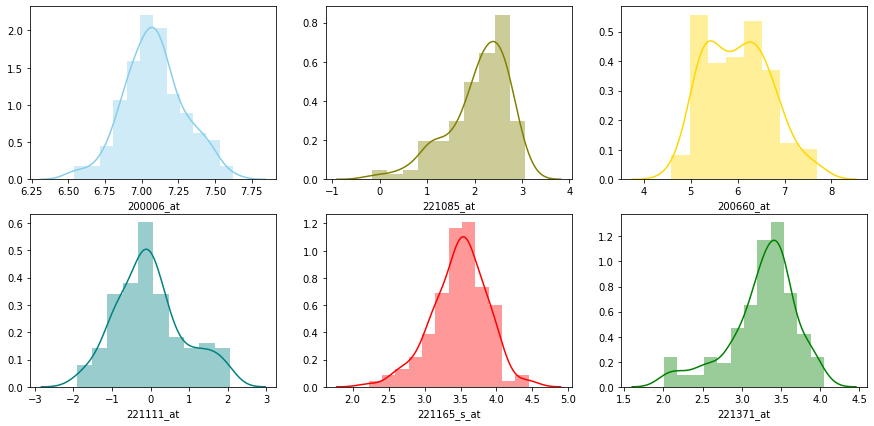

In [38]:
f, axes = plt.subplots(2, 3, figsize=(15, 7))
sns.distplot( data["200006_at"] , color="skyblue", ax=axes[0, 0])
sns.distplot( data["221085_at"] , color="olive", ax=axes[0, 1])
sns.distplot( data["200660_at"] , color="gold", ax=axes[0, 2])
sns.distplot( data["221111_at"] , color="teal", ax=axes[1, 0])
sns.distplot( data["221165_s_at"] , color="red", ax=axes[1, 1])
sns.distplot( data["221371_at"] , color="green", ax=axes[1, 2])

### Seperate data into target and features

In [39]:
# divide data into dependent (Y) and independent (X) data
X = data.iloc[:,1:313]
Y = data.iloc[:,0]

In [40]:
# split data into training and testng data
from sklearn.model_selection import train_test_split

X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size = 0.20)
print(Y_train.shape, Y_test.shape)

(100,) (25,)


In [41]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Apply PCA for data visualization

In [43]:
#Apply PCA for data visualization
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model
pca.fit(X_train_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_train_scaled)
print("Original shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (100, 312)
Reduced shape: (100, 2)


In [44]:
type(Y_train)

pandas.core.series.Series

In [45]:
pca_df = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])
pca_df['Group'] = Y_train.values
pca_df.head(10)

,principal component 1,principal component 2,Group
0,2.179740,-9.823182,1
1,0.734300,0.255567,0
2,-7.424269,-6.865465,0
3,4.783034,5.929466,2
4,-0.437071,-0.797282,1
5,-1.080937,-7.677535,1
6,-4.722883,-3.983888,0
7,-0.028979,-4.521646,1
8,-8.546960,6.804465,0
9,-5.671341,2.632635,0


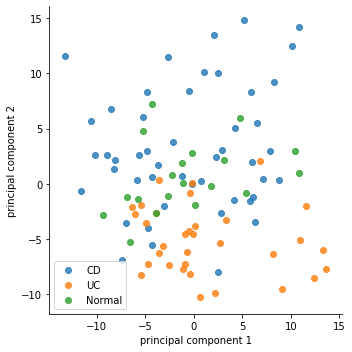

In [46]:
sns.lmplot( x="principal component 1", y="principal component 2", data=pca_df, fit_reg=False, hue='Group',
          legend=False)
plt.legend(['CD', 'UC','Normal'])

### Fit an SVM model with 10-fold cross validation

In [47]:
# fit SVM model
from sklearn import svm
from sklearn.model_selection import cross_val_score

svc1 =svm.SVC(gamma='auto', kernel = 'rbf')
scores = cross_val_score(estimator = svc1, X = X_train_scaled, y = Y_train, cv = 10)
print("accuracy of the model :{:.4f} +/- {:.4f}".format(scores.mean(), scores.std()))

accuracy of the model :0.8121 +/- 0.0757


### Tune parameters of SVM model with grid search cv

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
grid = {'C': [0.1, 1, 10, 100, 1000],
       'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
       'kernel': ['rbf','linear','poly']}

In [50]:
svm2 = svm.SVC()
grid_search = GridSearchCV(estimator = svm2, param_grid = grid, 
                          cv = 10, n_jobs = 3, verbose = 2, iid = False)
grid_search.fit(X_train_scaled, Y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 241 tasks      | elapsed:    2.4s
[Parallel(n_jobs=3)]: Done 750 out of 750 | elapsed:    4.2s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid=False, n_jobs=3,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [51]:
grid_search.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [52]:
best_grid = grid_search.best_estimator_
scores = cross_val_score(estimator = best_grid, X = X_train_scaled, y = Y_train, cv = 10)
print("accuracy of the model :{:.4f} +/- {:.4f}".format(scores.mean(), scores.std()))

accuracy of the model :0.9416 +/- 0.0629


### Predict for test data

In [53]:
Y_pred = best_grid.predict(X_test_scaled)

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[10,  0,  0],
       [ 0,  8,  0],
       [ 1,  1,  5]], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(Y_test, Y_pred)

0.92